In [1]:
import numpy as np
from ReferenceElement import *
from dg_functions_maxwell_equations import *
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
N = 8
K = 8
CF = 2.**(-7)
start = -1.
end = 1.
mu = 1.
eps = 1.
alpha = 0.
h = (end-start)/K


reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h

x = get_x_elements(start,end, K, reference_interval)
dx_min = get_dx_min(x)
dt = CF*dx_min

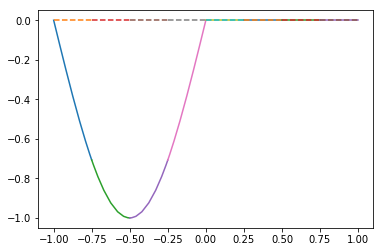

In [3]:
# initializing data
def E_initial(x):
    return np.sin(np.pi*np.heaviside(-x,0)*x)
def H_initial(x):
    return 0*x
E = E_initial(x)
H = H_initial(x)
for i in range(len(E)):
    plt.plot(x[i],E[i])
    plt.plot(x[i],H[i], linestyle = '--')

In [9]:
#for i in range(len(u)):
#   plt.plot(x[i],q[i])

In [115]:
t = 0.
E = E_initial(x)
H = H_initial(x)
t_target = 1.5
nt = int((t_target-t)/dt)
print(nt)


15322


In [116]:
for n in range(nt):
    Hn = H.copy()
    En = E.copy()
    E = RK4_Step(dt, DG_du_dt, E, K, N,t,1./eps,alpha, M_inv, M_inv_S, Hn,flux_maxwell_E,radiative = 0)
    E[0][0] = 0
    E[-1][-1] = 0
    H = RK4_Step(dt, DG_du_dt, H, K, N,t,1./mu ,alpha, M_inv, M_inv_S, En,flux_maxwell_H,radiative = 1)
    t += dt
print(t)

1.4999101506892272


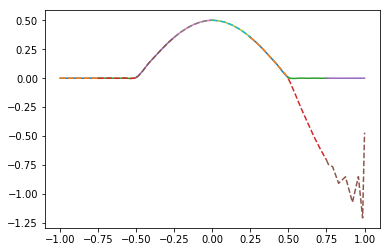

In [117]:
for i in range(len(H)):
    plt.plot(x[i],E[i])
    plt.plot(x[i],H[i], linestyle = '--')
#plt.ylim(-1,0.5)